In [15]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [16]:
sub_dir = 'sub/'

In [17]:
def init_logger(log_file='train.log'):
    from logging import getLogger, INFO, FileHandler,  Formatter,  StreamHandler
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

LOGGER = init_logger()


In [18]:
def get_score(y_true, y_pred):
    score = roc_auc_score(y_true, y_pred)
    return score

In [19]:
def get_result(result_df):
    preds = result_df['preds'].values
    labels = result_df['target'].values
    score = get_score(labels, preds)
    LOGGER.info(f'Score: {score:<.4f}')

In [22]:
subs = [pd.read_csv(csv) for csv in sorted(glob(os.path.join(sub_dir, '*sub*csv')))]
sub_probs = [sub.target.values for sub in subs]
wts = [1/2]*2
assert len(wts)==len(sub_probs)
sub_ens = np.sum([wts[i]*sub_probs[i] for i in range(len(wts))],axis=0)

df_sub = subs[0]
df_sub['target'] = sub_ens
#get_result(df_sub)
df_sub.to_csv(f"final_sub5.csv",index=False)

<AxesSubplot:>

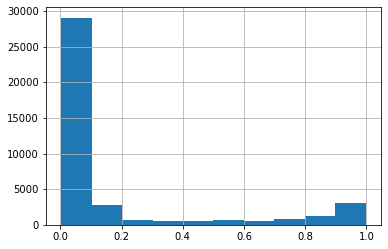

In [23]:
df_sub['target'].hist()

<AxesSubplot:>

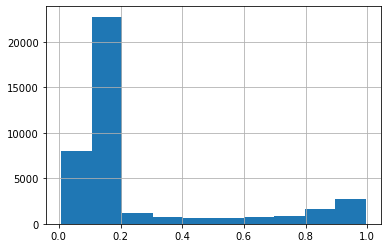

In [11]:
df_sub['target'].hist()

<AxesSubplot:>

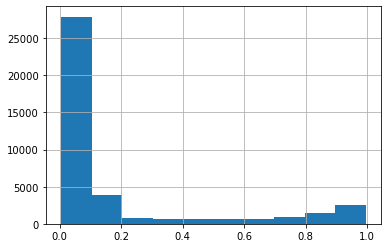

In [9]:
df_sub['target'].hist()